In [64]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from mt5linux import MetaTrader5
# import MetaTrader5 as mt5

In [65]:
# connecto to the server
mt5 = MetaTrader5(
    # host = 'localhost' (default)
    # port = 18812       (default)
) 

# connect to MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()
 
mt5.login(
   "30565290",                    # account number
   password="@Ssc21707232",      # password
   server="Deriv-Demo",          # server name as it is specified in the terminal
   timeout=120           # timeout
)

False

In [66]:
# request connection status and parameters
print(mt5.terminal_info())


TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=True, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=True, build=4387, maxbars=100000, codepage=0, ping_last=139693, community_balance=0.0, retransmission=0.008235468515803864, company='MetaQuotes Ltd.', name='MetaTrader 5', language='English', path='C:\\Metatrader-5', data_path='C:\\Metatrader-5', commondata_path='C:\\users\\root\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')


In [67]:
# get data on MetaTrader 5 version
print(mt5.version())

(500, 4387, '12 Jun 2024')


In [68]:
# get data on account info
print(mt5.account_info())

AccountInfo(login=30565290, trade_mode=0, leverage=500, limit_orders=50, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=23783.34, credit=0.0, profit=0.0, equity=23783.34, margin=0.0, margin_free=23783.34, margin_level=0.0, margin_so_call=100.0, margin_so_so=50.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='Samuel Ojietohamen', server='Deriv-Demo', currency='USD', company='Deriv.com Limited')


## Request ticks

In [69]:
# request 1000 ticks from Step Index
step_index_ticks = mt5.copy_ticks_from("Step Index", datetime(2020,1,28,13), 1000, mt5.COPY_TICKS_ALL)
step_index_ticks

array([(1690848000, 8626.7, 8626.8, 0., 0, 1690848000699, 134, 0.),
       (1690848001, 8626.8, 8626.9, 0., 0, 1690848001211, 134, 0.),
       (1690848002, 8626.9, 8627. , 0., 0, 1690848002202, 134, 0.),
       (1690848003, 8627. , 8627.1, 0., 0, 1690848003180, 134, 0.),
       (1690848004, 8626.9, 8627. , 0., 0, 1690848004256, 134, 0.),
       (1690848005, 8626.8, 8626.9, 0., 0, 1690848005178, 134, 0.),
       (1690848006, 8626.9, 8627. , 0., 0, 1690848006190, 134, 0.),
       (1690848007, 8626.8, 8626.9, 0., 0, 1690848007180, 134, 0.),
       (1690848008, 8626.7, 8626.8, 0., 0, 1690848008186, 134, 0.),
       (1690848009, 8626.6, 8626.7, 0., 0, 1690848009183, 134, 0.),
       (1690848010, 8626.5, 8626.6, 0., 0, 1690848010252, 134, 0.),
       (1690848011, 8626.4, 8626.5, 0., 0, 1690848011181, 134, 0.),
       (1690848012, 8626.5, 8626.6, 0., 0, 1690848012191, 134, 0.),
       (1690848013, 8626.6, 8626.7, 0., 0, 1690848013194, 134, 0.),
       (1690848014, 8626.5, 8626.6, 0., 0, 16908

### Request ticks from a time range

In [70]:
import pytz

# set time zone to UTC
timezone = pytz.timezone("Etc/UTC")
# create 'datetime' objects in UTC time zone to avoid the implementation of a local time zone offset
utc_from = datetime(2024, 1, 10, tzinfo=timezone)
utc_to = datetime(2024, 1, 11, tzinfo=timezone)

# request ticks from Volatility 75 Index 
volatility_75_index_ticks = mt5.copy_ticks_range("Volatility 75 Index",  utc_from, utc_to, mt5.COPY_TICKS_ALL)
volatility_75_index_ticks

array([(1704844800, 249784.26, 249846.26, 0., 0, 1704844800985, 134, 0.),
       (1704844802, 249748.75, 249810.75, 0., 0, 1704844802285, 134, 0.),
       (1704844804, 249787.1 , 249849.1 , 0., 0, 1704844804227, 134, 0.),
       ...,
       (1704931194, 241736.48, 241798.48, 0., 0, 1704931194268, 134, 0.),
       (1704931196, 241715.76, 241777.76, 0., 0, 1704931196264, 134, 0.),
       (1704931198, 241689.57, 241751.57, 0., 0, 1704931198271, 134, 0.)],
      dtype=[('time', '<i8'), ('bid', '<f8'), ('ask', '<f8'), ('last', '<f8'), ('volume', '<u8'), ('time_msc', '<i8'), ('flags', '<u4'), ('volume_real', '<f8')])

## Get bars from different symbols in a number of ways

In [71]:
volatility_25_index_rates = mt5.copy_rates_from("Volatility 25 Index", mt5.TIMEFRAME_M1, datetime(2024,1,28,13), 1000)
volatility_25_index_rates

In [72]:
volatility_50_index_rates = mt5.copy_rates_from_pos("Volatility 50 Index", mt5.TIMEFRAME_M1, 0, 1000)
volatility_50_index_rates

array([(1722870660, 254.72  , 254.7641, 254.5394, 254.7011, 30, 350, 0),
       (1722870720, 254.7246, 254.8176, 254.6748, 254.7831, 30, 350, 0),
       (1722870780, 254.7219, 254.923 , 254.7082, 254.7463, 30, 350, 0),
       (1722870840, 254.7906, 254.9337, 254.6529, 254.7805, 30, 350, 0),
       (1722870900, 254.7745, 254.8455, 254.7211, 254.8391, 30, 350, 0),
       (1722870960, 254.868 , 254.8757, 254.6983, 254.7191, 30, 350, 0),
       (1722871020, 254.7287, 254.7661, 254.6416, 254.6416, 30, 350, 0),
       (1722871080, 254.6   , 254.8539, 254.5986, 254.7006, 30, 350, 0),
       (1722871140, 254.6922, 254.6939, 254.4247, 254.5276, 30, 350, 0),
       (1722871200, 254.5153, 254.572 , 254.285 , 254.285 , 30, 350, 0),
       (1722871260, 254.3345, 254.4938, 254.2509, 254.3857, 30, 350, 0),
       (1722871320, 254.3968, 254.5971, 254.3872, 254.4368, 30, 350, 0),
       (1722871380, 254.4203, 254.7101, 254.4203, 254.6999, 30, 350, 0),
       (1722871440, 254.7343, 255.0563, 254.7259, 2

In [73]:
crash_1000_index_rates = mt5.copy_rates_range("Crash 1000 Index", mt5.TIMEFRAME_M1, datetime(2020,1,27,13), datetime(2020,1,28,13))
crash_1000_index_rates

array([(1716928560, 5499.026, 5499.35, 5499.026, 5499.35, 59, 550, 0)],
      dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])

In [74]:
# shut down connection to MetaTrader 5
mt5.shutdown()
 

True

## Preview Data

In [75]:
print('step_index_ticks(', len(step_index_ticks), ')')
for val in step_index_ticks[:10]: print(val)

step_index_ticks( 1000 )
(1690848000, 8626.7, 8626.8, 0., 0, 1690848000699, 134, 0.)
(1690848001, 8626.8, 8626.9, 0., 0, 1690848001211, 134, 0.)
(1690848002, 8626.9, 8627., 0., 0, 1690848002202, 134, 0.)
(1690848003, 8627., 8627.1, 0., 0, 1690848003180, 134, 0.)
(1690848004, 8626.9, 8627., 0., 0, 1690848004256, 134, 0.)
(1690848005, 8626.8, 8626.9, 0., 0, 1690848005178, 134, 0.)
(1690848006, 8626.9, 8627., 0., 0, 1690848006190, 134, 0.)
(1690848007, 8626.8, 8626.9, 0., 0, 1690848007180, 134, 0.)
(1690848008, 8626.7, 8626.8, 0., 0, 1690848008186, 134, 0.)
(1690848009, 8626.6, 8626.7, 0., 0, 1690848009183, 134, 0.)


In [76]:
print('volatility_75_index_ticks(', len(volatility_75_index_ticks), ')')
for val in volatility_75_index_ticks[:10]: print(val)

volatility_75_index_ticks( 43194 )
(1704844800, 249784.26, 249846.26, 0., 0, 1704844800985, 134, 0.)
(1704844802, 249748.75, 249810.75, 0., 0, 1704844802285, 134, 0.)
(1704844804, 249787.1, 249849.1, 0., 0, 1704844804227, 134, 0.)
(1704844806, 249716.43, 249778.43, 0., 0, 1704844806248, 134, 0.)
(1704844808, 249718.8, 249780.8, 0., 0, 1704844808227, 134, 0.)
(1704844810, 249700.58, 249762.58, 0., 0, 1704844810283, 134, 0.)
(1704844812, 249699.91, 249761.91, 0., 0, 1704844812224, 134, 0.)
(1704844814, 249751.54, 249813.54, 0., 0, 1704844814274, 134, 0.)
(1704844816, 249760.74, 249822.74, 0., 0, 1704844816288, 134, 0.)
(1704844818, 249779.68, 249841.68, 0., 0, 1704844818269, 134, 0.)


In [77]:
# print('volatility_25_index_rates(', len(volatility_25_index_rates), ')')
# for val in volatility_25_index_rates[:10]: print(val)

In [78]:
print('volatility_50_index_rates(', len(volatility_50_index_rates), ')')
for val in volatility_50_index_rates[:10]: print(val)

volatility_50_index_rates( 1000 )
(1722870660, 254.72, 254.7641, 254.5394, 254.7011, 30, 350, 0)
(1722870720, 254.7246, 254.8176, 254.6748, 254.7831, 30, 350, 0)
(1722870780, 254.7219, 254.923, 254.7082, 254.7463, 30, 350, 0)
(1722870840, 254.7906, 254.9337, 254.6529, 254.7805, 30, 350, 0)
(1722870900, 254.7745, 254.8455, 254.7211, 254.8391, 30, 350, 0)
(1722870960, 254.868, 254.8757, 254.6983, 254.7191, 30, 350, 0)
(1722871020, 254.7287, 254.7661, 254.6416, 254.6416, 30, 350, 0)
(1722871080, 254.6, 254.8539, 254.5986, 254.7006, 30, 350, 0)
(1722871140, 254.6922, 254.6939, 254.4247, 254.5276, 30, 350, 0)
(1722871200, 254.5153, 254.572, 254.285, 254.285, 30, 350, 0)


In [79]:
print('crash_1000_index_rates(', len(crash_1000_index_rates), ')')
for val in crash_1000_index_rates[:10]: print(val)


crash_1000_index_rates( 1 )
(1716928560, 5499.026, 5499.35, 5499.026, 5499.35, 59, 550, 0)


## Plots

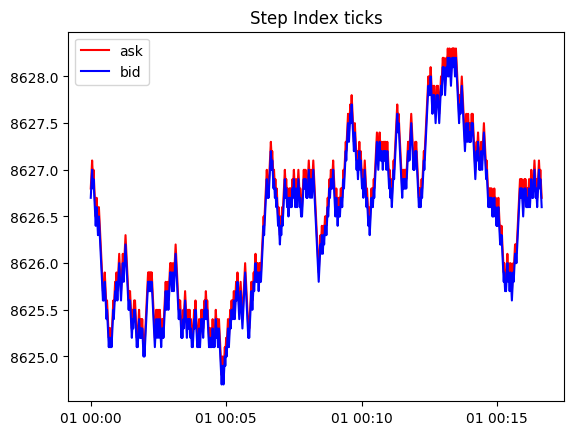

In [80]:
#PLOT
# create DataFrame out of the obtained data
ticks_frame = pd.DataFrame(step_index_ticks)
# convert time in seconds into the datetime format
ticks_frame['time']=pd.to_datetime(ticks_frame['time'], unit='s')
# display ticks on the chart
plt.plot(ticks_frame['time'], ticks_frame['ask'], 'r-', label='ask')
plt.plot(ticks_frame['time'], ticks_frame['bid'], 'b-', label='bid')
 
# display the legends
plt.legend(loc='upper left')
 
# add the header
plt.title('Step Index ticks')
 
# display the chart
plt.show()

## Send Orders

In [81]:
import time

In [82]:
# establish connection to the MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
    
# prepare the buy request structure
symbol = "Step Index"
symbol_info = mt5.symbol_info(symbol)
if symbol_info is None:
    print(symbol, "not found, can not call order_check()")
    mt5.shutdown()
    quit()
 
# if the symbol is unavailable in MarketWatch, add it
if not symbol_info.visible:
    print(symbol, "is not visible, trying to switch on")
    if not mt5.symbol_select(symbol,True):
        print("symbol_select({}}) failed, exit",symbol)
        mt5.shutdown()
        quit()
 
lot = 0.1
point = mt5.symbol_info(symbol).point
price = mt5.symbol_info_tick(symbol).ask
deviation = 20

In [83]:
request = {
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": lot,
    "type": mt5.ORDER_TYPE_BUY,
    "price": price,
    "sl": price - 100 * point,
    "tp": price + 100 * point,
    "deviation": deviation,
    "magic": 234000,
    "comment": "python script open",
    "type_time": mt5.ORDER_TIME_GTC,
    "type_filling": mt5.ORDER_FILLING_FOK,
}
 
# send a trading request
result = mt5.order_send(request)
# check the execution result
print("1. order_send(): by {} {} lots at {} with deviation={} points".format(symbol,lot,price,deviation));
if result.retcode != mt5.TRADE_RETCODE_DONE:
    print("2. order_send failed, retcode={}".format(result.retcode))
    # request the result as a dictionary and display it element by element
    result_dict=result._asdict()
    for field in result_dict.keys():
        print("   {}={}".format(field,result_dict[field]))
        # if this is a trading request structure, display it element by element as well
        if field=="request":
            traderequest_dict=result_dict[field]._asdict()
            for tradereq_filed in traderequest_dict:
                print("       traderequest: {}={}".format(tradereq_filed,traderequest_dict[tradereq_filed]))
    print("shutdown() and quit")
    mt5.shutdown()
    quit()
 

1. order_send(): by Step Index 0.1 lots at 8084.3 with deviation=20 points


In [84]:
print("2. order_send done, ", result)
print("   opened position with POSITION_TICKET={}".format(result.order))

2. order_send done,  OrderSendResult(retcode=10009, deal=3938724236, order=8027423573, volume=0.1, price=8084.4, bid=8084.2, ask=8084.4, comment='Request executed', request_id=613197502, retcode_external=0, request=TradeRequest(action=1, magic=234000, order=0, symbol='Step Index', volume=0.1, price=8084.3, stoplimit=0.0, sl=8074.3, tp=8094.3, deviation=20, type=0, type_filling=0, type_time=0, expiration=0, comment='python script open', position=0, position_by=0))
   opened position with POSITION_TICKET=8027423573


In [85]:
sleep_time=10
print("   sleep {} seconds before closing position #{}".format(sleep_time, result.order))
time.sleep(sleep_time)

# create a close request
position_id=result.order
price=mt5.symbol_info_tick(symbol).bid
deviation=20
request={
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": lot,
    "type": mt5.ORDER_TYPE_SELL,
    "position": position_id,
    "price": price,
    "deviation": deviation,
    "magic": 234000,
    "comment": "python script close",
    "type_time": mt5.ORDER_TIME_GTC,
    "type_filling": mt5.ORDER_FILLING_FOK,
}
# send a trading request
result=mt5.order_send(request)

# check the execution result
print("3. close position #{}: sell {} {} lots at {} with deviation={} points".format(position_id,symbol,lot,price,deviation));
if result.retcode != mt5.TRADE_RETCODE_DONE:
    print("4. order_send failed, retcode={}".format(result.retcode))
    print("   result",result)
else:
    print("4. position #{} closed, {}".format(position_id,result))
    # request the result as a dictionary and display it element by element
    result_dict=result._asdict()
    for field in result_dict.keys():
        print("   {}={}".format(field,result_dict[field]))
        # if this is a trading request structure, display it element by element as well
        if field=="request":
            traderequest_dict=result_dict[field]._asdict()
            for tradereq_filed in traderequest_dict:
                print("       traderequest: {}={}".format(tradereq_filed,traderequest_dict[tradereq_filed]))
 
# shut down connection to the MetaTrader 5 terminal
mt5.shutdown()

   sleep 10 seconds before closing position #8027423573


3. close position #8027423573: sell Step Index 0.1 lots at 8084.2 with deviation=20 points
4. position #8027423573 closed, OrderSendResult(retcode=10009, deal=3938724361, order=8027423713, volume=0.1, price=8084.2, bid=8084.2, ask=8084.4, comment='Request executed', request_id=613197503, retcode_external=0, request=TradeRequest(action=1, magic=234000, order=0, symbol='Step Index', volume=0.1, price=8084.2, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=1, type_filling=0, type_time=0, expiration=0, comment='python script close', position=8027423573, position_by=0))
   retcode=10009
   deal=3938724361
   order=8027423713
   volume=0.1
   price=8084.2
   bid=8084.2
   ask=8084.4
   comment=Request executed
   request_id=613197503
   retcode_external=0
   request=TradeRequest(action=1, magic=234000, order=0, symbol='Step Index', volume=0.1, price=8084.2, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=1, type_filling=0, type_time=0, expiration=0, comment='python script close', positio

True